# <center> Numbers as data: A reintroduction </center>

## <center> ACE 592 </center>


We're mostly used to this category of data, so for this section we will mostly talk about the following, common issue with data analysis:

## My data is too big for my computer!
## WHAT DO I DO???

First of all, what is __big data__?

The three V's:
1. Velocity
    - Data is being collected in realtime and streamed in constantly.
    - Class example: our Twitter streaming API.
2. Variety
    - Data that is in the form of images or text (as an example).
    - Class example: our text data or image data.
3. Volume
    - The size of the data.
    - In this module we will finally talk about data that is truly __big__.

### Why this is important:
The practice of __data science__ involves knowing how to deal with data in all of its forms.

We have already seen variety and some velocity, so now let's look at volume.

__Knowing how to store and process data efficiently is absolutely crucial to workflow__.

### Data Processing Problem Solving:

In the next three weeks, we will discuss a range of data processing by focusing on how to fix our code when data processing either 1) does not fit into memory or 2) is too slow.

How we will usually approach it:
1. Sketch the problem.
2. Run through the checklist.
3. If nothing above works, get more memory!



__First thing__:

First things first: sketch out what you are trying to do!

Why should we do this?

- Sometimes the solution is __not__ more memory, but rather __smarter code__!
- By thinking of all the steps and connecting them it can be easier to see where the bottlenecks are and how to fix them

__Second thing__:

Once you've done that, run through these questions:

1. Can we change the __data type__?
2. Can we __vectorize__ the operation?
3. Can the operation be __chunked__?
4. Can the operation be __parallelized__?
5. Can the operation be __distributed__?

__Last thing__:

Your last resort is to hop on a server.

Some options:
1. A mid-tier server, usually around 200 gigs of memory (usually shared with others).
    - Such servers are usually available in the Department.
2. A cluster, which has much more memory.
    - Available at the college or university level, but only accepts __batched__ commands.
3. A paid cloud computing service such as Google Cloud or AWS.
    - A good solution if you have a grant or external source to pay for it.

### Mapping the problem

Why is this important?
- Sometimes the solution is __not__ more memory, but rather __smarter code__!
- By thinking of all the steps and connecting them it can be easier to see where the bottlenecks are.
- Naturally can lead to you the solution.

### Example 1: Hub Distance
For a paper, I wanted to look at the effect of the __closest__ Production Credit Association, a type of credit institution, on crop yields for a given county.

Here's the data I have so far:
- County-level crop yields.
- A county shape file.
- A shapefile of the bank locations.
- Data about the banks.

How would I proceed?

#### For each step, let's specify:
- The inputs.
- The operations.
- The outputs.

#### Step 1: Find the closest bank to each county centroid.
How would I do this? Given a county centroid, I could calculate all the distances to all the different banks. Then I could sort the bank locations to find the one that has the smallest distance. I could then find the ID of the one with the smallest distance and assign that id to each county centroid.

Inputs:
- Bank locations
- County centroids

Operations:
- Centroid calculation.
- Distance calculation for each centroid.
- Value assign.

Outputs: 
- A correspondence between a county id and a bank id.

#### Step 2: Execute a merge between the datasets.

Would have to merge the correspondence to the county-level dataset, and then use this as the key to merge the datasets on.

Inputs:
- County data
- Bank data
- Correspondence

Operations:
- Merge

Outputs:
- Merged dataset.

#### What if you can't fit it in memory?
- Read each country centroid in to data and calculate distances.
- Then write out each distance matrix you calculate.

#### What if it takes way too long?
- Could theoretically parallelize this operation given that each draw is independent.

### Example 2: Pixel Counts

In your assignment, it took a lot of time to count pixels and took a lot of memory.

What's a better way?

#### Step 1: Split the raster into columns.

#### Step 2: Count the pixels in each column.

#### Step 3: Sum all the pixel counts together.

## Data Types
Our first line of defense against memory problems is defining what our data types are.

Recall that the more values a number can take, the more __bits__ it needs to store. The smallest data type would be a boolean (0 or 1) and the largest would be a 64 bit integer.

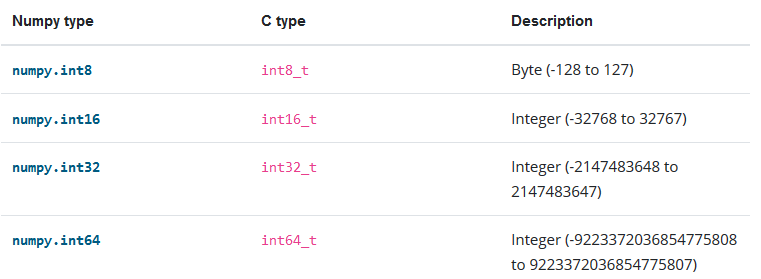

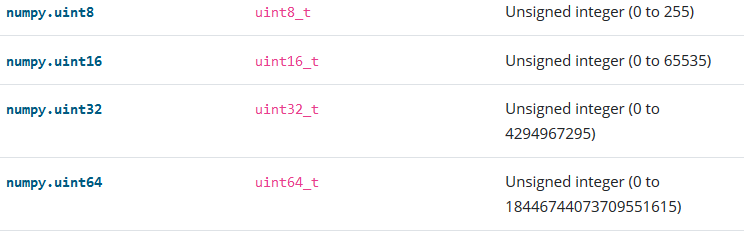

One thing you will notice about pandas is that it will automatically store things in the dataframe with 64 bits.

In [1]:
import pandas as pd
ex = pd.DataFrame([0,1,0,1,1,0]*10**5)
ex.to_csv("ex_big.csv",index=False)

ex

,0
0,0
1,1
2,0
3,1
4,1
...,...
599995,1
599996,0
599997,1
599998,1


In [2]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       600000 non-null  int64
dtypes: int64(1)
memory usage: 4.6 MB


In [3]:
ex_64 = ex[0].memory_usage()

In [4]:
ex[0] = ex[0].astype("uint8")
ex.to_csv("ex_small.csv",index=False)
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       600000 non-null  uint8
dtypes: uint8(1)
memory usage: 586.1 KB


In [5]:
ex_8 = ex[0].memory_usage()

In [6]:
(1-ex_8/ex_64)*100

87.49766672888724

An 87% reduction in memory usage just from changing one data type!

In [7]:
pd.read_csv("ex.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       600000 non-null  int64
dtypes: int64(1)
memory usage: 4.6 MB


Part of the pandas read_csv function always reads things in with 64 bits unless you tell it to otherwise. This is a common reason for bloated dataframes.

To get around this, you can specify a dtype in the read function.

In [8]:
pd.read_csv("ex.csv",dtype={0:"uint8"}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       600000 non-null  uint8
dtypes: uint8(1)
memory usage: 586.1 KB


Specifying a dictionary ahead of time can cut down on the memory footprint.

### Other types of data:
- `float`, which is what the data must be to store `np.nan` as missing values.
- `boolean`, which is similar to what we stored above.
- `datetime`, which represents dates.
- `category`, a special `pandas` object for variables with discrete levels.

An example dataset I have been looking at of traits of different dairy animals for sale.

In [9]:
df = pd.read_csv("C:/Users/jhtchns2/classes/naab_example.csv")

In [10]:
df.head()

,breed,country_of_origin,sire_code,period,price,birth_date,pta_milk,pta_fat_lb,pta_scs,pta_protein_lb,pta_dpr
0,AY,CAN,10092,2000-02,12.0,1991-10-20,1124.0,41.0,3.32,32.0,NaN
1,AY,CAN,10094,2000-02,18.0,1992-06-15,1664.0,44.0,2.92,35.0,NaN
2,AY,CAN,10181,2000-02,12.0,1992-05-30,939.0,45.0,2.87,27.0,NaN
3,AY,CAN,10180,2000-02,12.0,1992-06-25,660.0,30.0,3.28,21.0,NaN
4,AY,CAN,10095,2000-02,15.0,1992-10-25,259.0,26.0,3.18,6.0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150831 entries, 0 to 150830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   breed              150831 non-null  object 
 1   country_of_origin  150831 non-null  object 
 2   sire_code          150831 non-null  int64  
 3   period             150831 non-null  object 
 4   price              97467 non-null   float64
 5   birth_date         150831 non-null  object 
 6   pta_milk           150828 non-null  float64
 7   pta_fat_lb         150828 non-null  float64
 8   pta_scs            150757 non-null  float64
 9   pta_protein_lb     150828 non-null  float64
 10  pta_dpr            138108 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 12.7+ MB


How can I reduce the memory footprint of this dataset?

### Downcasting Variables

The `pandas` function `to_numeric` will, given an object, reduce it to the smalles byte object possible with `downcast=variable_type`:

In [12]:
df.price

0         12.0
1         18.0
2         12.0
3         12.0
4         15.0
          ... 
150826     NaN
150827     NaN
150828     NaN
150829     NaN
150830    26.0
Name: price, Length: 150831, dtype: float64

In [13]:
pd.Series([str(x).split(".")[1] for x in df.price.dropna()]).value_counts()

0    97467
dtype: int64

This is clearly just an integer. Let's try and downcast it:

In [16]:
pd.to_numeric(df.price,downcast="integer")

0         12.0
1         18.0
2         12.0
3         12.0
4         15.0
          ... 
150826     NaN
150827     NaN
150828     NaN
150829     NaN
150830    26.0
Name: price, Length: 150831, dtype: float64

It didnt work! Why? 

Currently, pandas only supports missing values in floats and not in integers.

Two options:
1. Downcast to float.
2. Fill the missing values with another integer.

In [18]:
df.price.memory_usage()

1206776

In [17]:
pd.to_numeric(df.price,downcast="float").head(), pd.to_numeric(df.price,downcast="float").memory_usage()

(0    12.0
 1    18.0
 2    12.0
 3    12.0
 4    15.0
 Name: price, dtype: float32,
 603452)

In [19]:
pd.to_numeric(df.price.fillna(-1),downcast="integer").head(), \
pd.to_numeric(df.price.fillna(-1),downcast="integer").memory_usage()

(0    12
 1    18
 2    12
 3    12
 4    15
 Name: price, dtype: int16,
 301790)

Notice that filling a missing value in this case can get memory usage in half since it now only needs 16 bits to store it instead of 32.

The pro of filling is that you an reduce memory even more.

The con of filling is that you can accidentally run analysis without taking out your "fill value," in this case -1, which will cause problems with the analysis.

In [20]:
def downcast(x):
    return pd.to_numeric(x,downcast="float")

df_num = df.iloc[:,6:]
df_num_red = df_num.apply(downcast,axis=1)

In [21]:
df_num_red.memory_usage().sum()/df_num.memory_usage().sum()

0.5000106076738564

Casting everything to float32 from float64 cut memory in half (which makes sense).

### Date Objects

On occaison, an `object` will take up less memory if it is converted to a datetime object. In this case, the birth date is exactly the same so there will be no memory savings.

But there could be memory savings if we saved this as an integer:

In [22]:
df['birth_date'].head(),df['period'].memory_usage() 

(0    1991-10-20
 1    1992-06-15
 2    1992-05-30
 3    1992-06-25
 4    1992-10-25
 Name: birth_date, dtype: object,
 1206776)

In [23]:
df.birth_date.str.replace("-","").astype(int).head(),\
df.birth_date.str.replace("-","").astype(int).memory_usage()

(0    19911020
 1    19920615
 2    19920530
 3    19920625
 4    19921025
 Name: birth_date, dtype: int32,
 603452)

Memory footprint gets cut in half just by taking out hyphens!

### Categories

One of these variables is a string that indicates the breed:

In [24]:
df.breed.head(),df.breed.memory_usage()

(0    AY
 1    AY
 2    AY
 3    AY
 4    AY
 Name: breed, dtype: object,
 1206776)

In [25]:
df.breed.nunique()

14

only 14 levels, which means this could benefit from the "category" object:

In [26]:
df.breed.astype("category"),df.breed.astype("category").memory_usage()

(0         AY
 1         AY
 2         AY
 3         AY
 4         AY
           ..
 150826    SR
 150827    SR
 150828    SR
 150829    WW
 150830    WW
 Name: breed, Length: 150831, dtype: category
 Categories (14, object): ['AY', 'BS', 'GU', 'HO', ..., 'RE', 'SM', 'SR', 'WW'],
 151711)

In [27]:
(1-df.breed.astype("category").memory_usage()/df.breed.memory_usage())*100

87.42840427718151

An 87% reduction in memory just from changing type!

Much like other programs like STATA, python is storing the labels and numbers separately and displaying them when necessary. The actual values it has been converted to are here:

In [28]:
df['breed_cat'] = df.breed.astype("category")

In [29]:
df['breed_cat'].cat.codes,df['breed_cat'].cat.codes.memory_usage()

(0          0
 1          0
 2          0
 3          0
 4          0
           ..
 150826    12
 150827    12
 150828    12
 150829    13
 150830    13
 Length: 150831, dtype: int8,
 150959)

Which is just an 8bit integer! No wonder it decreased the memory footprint so much...

Most of the memory savings here come from the fact that labels are repeated:

In [30]:
ABCD = pd.Series(["AA","BB","CC"]*1)
print("Regular column takes {} bytes, category takes {} bytes".format(ABCD.memory_usage(), ABCD.astype("category").memory_usage()))

Regular column takes 152 bytes, category takes 235 bytes


The category is bigger because it has to hold text labels as well as integers.

But if there are repeated labels, there will be memory savings:

In [31]:
ABCD = pd.Series(["AA","BB","CC"]*3)
print("Regular column takes {} bytes, category takes {} bytes".format(ABCD.memory_usage(), ABCD.astype("category").memory_usage()))

Regular column takes 200 bytes, category takes 241 bytes


Text(0, 0.5, 'Memory Usage')

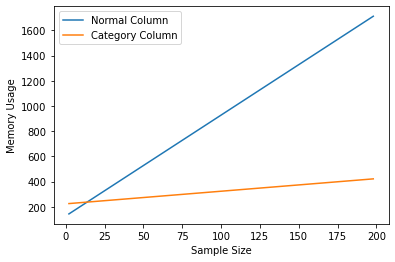

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def show_mem_cat(x):
    ABCD = pd.Series(["AAAAA","BBBBB"]*x)
    return [len(ABCD),ABCD.memory_usage(),ABCD.astype("category").memory_usage()]

mem_df = pd.DataFrame([show_mem_cat(x) for x in np.arange(1,100)]).set_index(0)
mem_df.columns= ['Normal Column',"Category Column"]

mem_df.plot()
plt.xlabel("Sample Size")
plt.ylabel("Memory Usage")

This reduces memory because pandas dataframes store all strings or columns with any strings as `objects` which typically take up the most memory.

By figuring out what ever datatype is, you can drastically decrease the memory footprint of your dataframe.

Let's try it:

In [33]:
base_mem = df.memory_usage().sum()
df.dtypes, base_mem

(breed                  object
 country_of_origin      object
 sire_code               int64
 period                 object
 price                 float64
 birth_date             object
 pta_milk              float64
 pta_fat_lb            float64
 pta_scs               float64
 pta_protein_lb        float64
 pta_dpr               float64
 breed_cat            category
 dtype: object,
 13424839)

In [34]:
type_dict = df.dtypes.to_dict()

In [36]:
for k,v in type_dict.items():
    if v==np.float64:
        df[k] = pd.to_numeric(df[k],downcast="float")
    if v==np.int64:
        df[k] = pd.to_numeric(df[k],downcast="integer")
    else:
        pass

In [37]:
df.memory_usage().sum()

8899909

Better, but let's keep going.

In [38]:
object_cols = list(df.dtypes[df.dtypes=="object"].index)

In [39]:
object_cols

['breed', 'country_of_origin', 'period', 'birth_date']

In [40]:
df['breed'] = df['breed'].astype("category")
df['country_of_origin'] = df['country_of_origin'].astype("category")
df['period'] = df['period'].astype("category")

df['birth_date'] = pd.to_numeric(df['birth_date'].str.replace("-",""),downcast="integer")

In [41]:
improved_mem = df.memory_usage().sum()

In [42]:
(1-improved_mem/base_mem)*100

61.75371637603997

So we cut our memory footprint 61% just from doing variable changes. Not bad!

We could have gotten it even lower if we had downcast some of the floats which were actually integers using fill values.

#### Writing Data

How do we make sure that pandas retains these data types?

A few options for "serialized" data formats which sacrifice readibility for storability:
- __Pickle__, a serialized dataformat only used in python. Since its only in python its not great for across platform use.
- __Apache Parquet__, an Apache format which is under the __Hadoop__ umbrella.
- __HDF5__, which distributes the data as a system (can be distributed across multiple machines).

#### When should we use `csv`? 

Still a very useful format, especially because it almost near universally able to be read across machines.

Also can edit actual file as a text document which can be useful.

### Vectorizing
What does it meant to vectorize an operation?

Essentially it is working with values as a set rather than individually.



In this case, `numpy` uses compiled C code under the hood to make this operation very fast.

Another example of an operation we already vectorized:

To look at crop rotation, we had to assign values to an array based on the values of other arrays.

The non-vectorized version:

In [ ]:
%timeit non_vect()

The vectorized version

In [ ]:
%timeit (1-y16)*y17

Another example: demeaning a variable.

Recall the dataset:

In [ ]:
df